Importing dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
dir="/content/drive/My Drive/facemaskdetector/dataset"
categories=["with_mask","without_mask"]
dataset=[]
for category in categories: 
    path = os.path.join(dir,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(64,64))
        label=categories.index(category)
        dataset.append([new_array,label])

        

In [5]:
import cv2
cv2.imread('/content/drive/My Drive/facemaskdetector/dataset/with_mask/0-with-mask.jpg')

array([[[38, 66, 60],
        [35, 63, 57],
        [32, 59, 50],
        ...,
        [11, 37, 31],
        [18, 41, 36],
        [13, 29, 22]],

       [[35, 63, 57],
        [32, 60, 54],
        [31, 58, 49],
        ...,
        [15, 38, 33],
        [21, 44, 36],
        [15, 31, 24]],

       [[32, 58, 52],
        [31, 57, 51],
        [31, 55, 47],
        ...,
        [17, 40, 32],
        [24, 45, 37],
        [20, 34, 28]],

       ...,

       [[30, 71, 56],
        [31, 72, 57],
        [35, 71, 57],
        ...,
        [12, 12, 18],
        [12, 12, 18],
        [12, 12, 18]],

       [[27, 69, 52],
        [28, 70, 53],
        [32, 68, 54],
        ...,
        [13, 12, 21],
        [13, 12, 21],
        [13, 12, 21]],

       [[26, 68, 51],
        [27, 69, 52],
        [31, 67, 53],
        ...,
        [13, 12, 21],
        [13, 12, 21],
        [13, 12, 21]]], dtype=uint8)

In [6]:
import random

random.shuffle(dataset)

In [7]:
for sample in dataset[:10]:
    print(sample[1])

1
0
1
0
0
1
1
1
1
0


In [8]:
X = []
y = []

for features,label in dataset:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,64,64, 1)


In [9]:
for x in X:
  x=x/255.0


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [11]:
model=Sequential()

In [12]:
model.add(Conv2D(32,(3,3),padding="same",strides=(1,1),input_shape=(64,64,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Conv2D(32,(3,3),activation="relu"))

In [13]:

model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Conv2D(32,(3,3),padding="same",strides=(1,1),input_shape=(64,64,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Conv2D(32,(3,3),padding="same",strides=(1,1),input_shape=(64,64,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Conv2D(32,(3,3),padding="same",strides=(1,1),input_shape=(64,64,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Conv2D(32,(3,3),padding="same",strides=(1,1),input_shape=(64,64,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [16]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
len(X)

1376

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [19]:
len(X_train)

1032

In [20]:
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
Y_train=np.array(Y_train)


In [21]:
model.fit(X_train,Y_train,batch_size=1,epochs=25)

Epoch 1/25
1032/1032 [==============================] - 31s 12ms/step - loss: 0.7094 - accuracy: 0.6413
Epoch 2/25
1032/1032 [==============================] - 12s 12ms/step - loss: 0.4296 - accuracy: 0.8018
Epoch 3/25
1032/1032 [==============================] - 12s 12ms/step - loss: 0.2609 - accuracy: 0.8963
Epoch 4/25
1032/1032 [==============================] - 12s 12ms/step - loss: 0.1830 - accuracy: 0.9383
Epoch 5/25
1032/1032 [==============================] - 13s 12ms/step - loss: 0.2574 - accuracy: 0.9102
Epoch 6/25
1032/1032 [==============================] - 12s 12ms/step - loss: 0.1891 - accuracy: 0.9336
Epoch 7/25
1032/1032 [==============================] - 12s 12ms/step - loss: 0.0927 - accuracy: 0.9738
Epoch 8/25
1032/1032 [==============================] - 13s 13ms/step - loss: 0.1640 - accuracy: 0.9340
Epoch 9/25
1032/1032 [==============================] - 14s 13ms/step - loss: 0.1289 - accuracy: 0.9478
Epoch 10/25
1032/1032 [==============================] - 13s 12m

[[0.9999359]]
with_mask


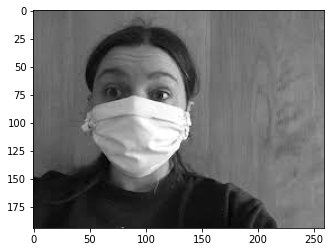

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
tested_image = cv2.imread("/content/drive/My Drive/facemaskdetector/facemask.jpg",0)
tested_image = image.img_to_array(tested_image)
tested_image=cv2.resize(tested_image,(64,64))
tested_image = np.expand_dims(tested_image,axis = 0)
tested_image=tested_image.reshape(-1,64,64,1)
output = model.predict(tested_image)
print(output)
if output[0][0]>=0.5:
  prediction = 'with_mask'
  print(prediction )
else:
  prediction = 'without_mask'
  print(prediction )
plt.imshow( cv2.imread("/content/drive/My Drive/facemaskdetector/facemask.jpg",0),cmap="gray")

[[0.83715004]]
with_mask


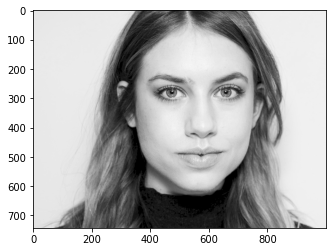

In [23]:
tested_image = cv2.imread("/content/drive/My Drive/facemaskdetector/faceimg.png",0)

tested_image = image.img_to_array(tested_image)
tested_image=cv2.resize(tested_image,(64,64))

tested_image = np.expand_dims(tested_image,axis = 0)
tested_image=tested_image.reshape(-1,64,64,1)
output = model.predict(tested_image)
print(output)
if output[0][0]>=0.5:
  prediction = 'with_mask'
  print(prediction )
else:
  prediction = 'without_mask'
  print(prediction )
plt.imshow( cv2.imread("/content/drive/My Drive/facemaskdetector/faceimg.png",0),cmap="gray")